In [1]:
import torch 
from medical_dataset import MedicalDataset
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from densenet import FCDenseNet103
from unet import UNet


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device='cpu'

In [3]:
D_test1 = MedicalDataset(1, "data_test")
D_test2 = MedicalDataset(2, "data_test")
D_test3 = MedicalDataset(3, "data_test")

82


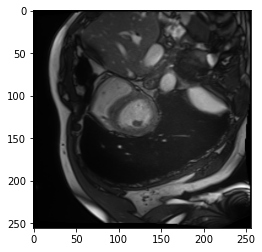

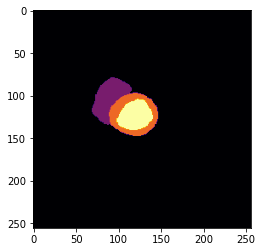

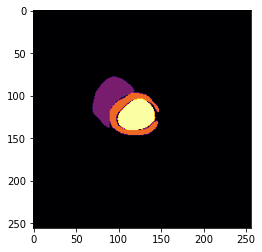

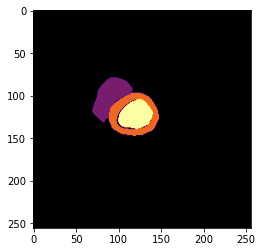

In [12]:
def combine_gt(index):
    im = np.zeros((256,256))
    im[D_test1[index][1][0]>0.5]=1
    im[D_test2[index][1][0]>0.5]=2
    im[D_test3[index][1][0]>0.5]=3
    return im/4.0

def combine_model(index, model_parse, sigmoid=False):
    im = np.zeros((256,256), dtype=int)
    inp = D_test1[index][0][None,:].to(device)
    model = UNet(1,1)
    for i in range(1,4):
        model.load_state_dict(torch.load(model_parse.format(i)))
        model.eval()
        model.to(device)
        out = model(inp)
        if sigmoid:
            out = torch.sigmoid(out)
        im[out[0,0].cpu()>0.5] = i 
    return im/4.0

def full_pipe(index, save=False):
    
    source = D_test1[index][0][0]
    plt.imshow(source, cmap='gray')
    if save:
        plt.imsave('figs/source_{}.png'.format(index), source, cmap='gray')
    plt.show()
    
    gt = combine_gt(index)
    plt.imshow(gt, cmap='inferno')
    if save:
        plt.imsave('figs/gt_{}.png'.format(index), gt, cmap='inferno')
    plt.show()
    
    #model_im = combine_model(index, 'models/unet{}_L2.pt')
    #plt.imshow(model_im, cmap='inferno')
    #if save:
    #    plt.imsave('figs/l2_{}.png'.format(index), model_im, cmap='inferno')
    #plt.show()
    
    model_im_ac = combine_model(index, 'models/unet{}_AC.pt')
    plt.imshow(model_im_ac, cmap='inferno')
    if save:
        plt.imsave('figs/ac_{}.png'.format(index), model_im_ac, cmap='inferno')
    plt.show()
        
    model_im_ce = combine_model(index, 'models/unet{}_CE.pt', True)
    plt.imshow(model_im_ce, cmap='inferno')
    if save:
        plt.imsave('figs/ce_{}.png'.format(index), model_im_ce, cmap='inferno')
    plt.show()
    

ind = np.random.randint(0, 209)
print(ind)
full_pipe(ind, True)
#full_pipe(194, True)

